In [1]:
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, color , io, transform
import os

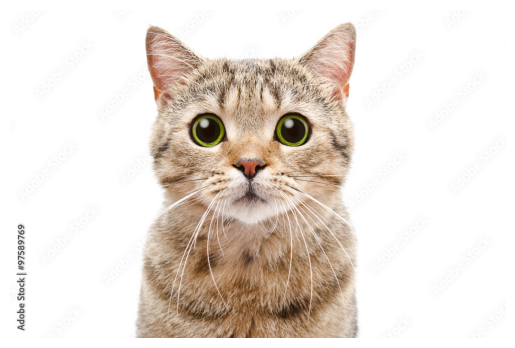

In [2]:
image_path = "Cat.png"
image  = Image.open(image_path)
#cv2.imread() # Image Will Be Read in array
#plt.imread( # Same as OpenCV)
plt.imshow(image) # Image SHow
plt.axis('off')
plt.show() # Image Canvas Activated

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


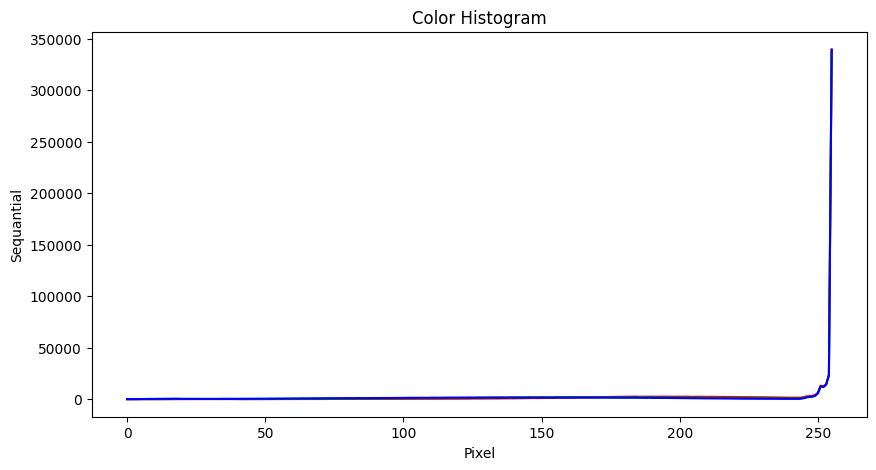

In [3]:
def image_show_in_histo(image_path):
    array_image = np.array(image)
    print(array_image)
    #plt.imread()
    plt.figure(figsize = (10, 5))
    for i , color in enumerate(['r', 'g', 'b']):
        hist, bins = np.histogram(array_image[:, :, i].flatten(), 256, [0, 256])
        plt.plot(hist, color = color)

    plt.title("Color Histogram")
    plt.xlabel("Pixel")
    plt.ylabel("Sequantial")
    plt.show()


image_show_in_histo(image)


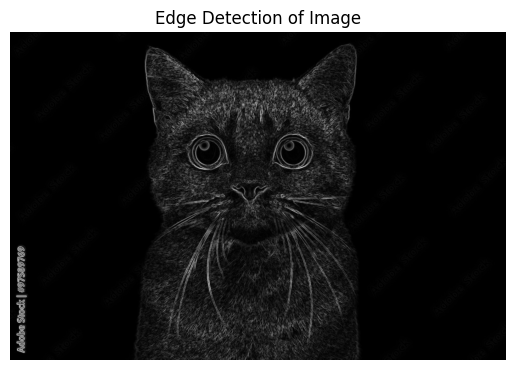

In [4]:
def edge_detect(image):
    gray_image = color.rgb2gray(np.array(image))
    edge_sobel  = filters.sobel(gray_image)
    plt.imshow(edge_sobel, cmap = "gray")
    plt.title("Edge Detection of Image")
    plt.axis("off")
    plt.show()

edge_detect(image)

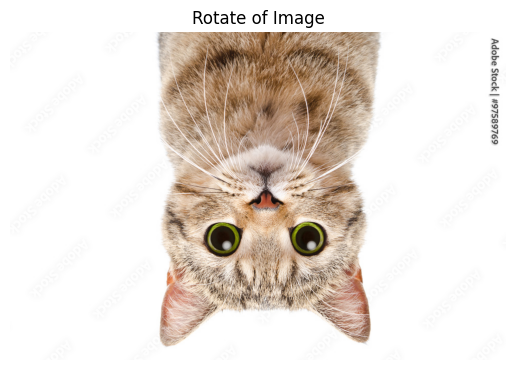

In [5]:
image_rotate = image.rotate(180)
plt.imshow(image_rotate)
plt.title("Rotate of Image")
plt.axis("off")
plt.show()

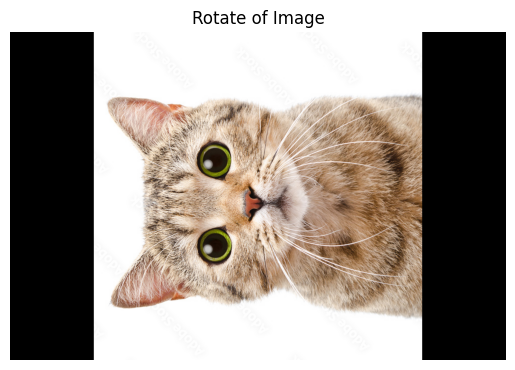

In [6]:
image_rotate = image.rotate(90)
plt.imshow(image_rotate)
plt.title("Rotate of Image")
plt.axis("off")
plt.show()

In [7]:
image_metadata = image._getexif()
metadata = image_metadata if image_metadata else "No Metadata Found"
metadata

{296: 2, 283: 73.06380857427718, 282: 73.06380857427718, 531: 1}

In [8]:
image_path ='Cat.png'
image  = Image.open(image_path)
gray_image = np.array(image.convert('L')) # Luminance


x = np.arange(0, gray_image.shape[1])
y = np.arange(0, gray_image.shape[0])

x, y = np.meshgrid(x, y)


fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, gray_image, rstride = 1, cstride = 1, cmap = plt.get_cmap("gray"), linewidth = 0)


ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D Surface")
plt.show()

KeyboardInterrupt: 

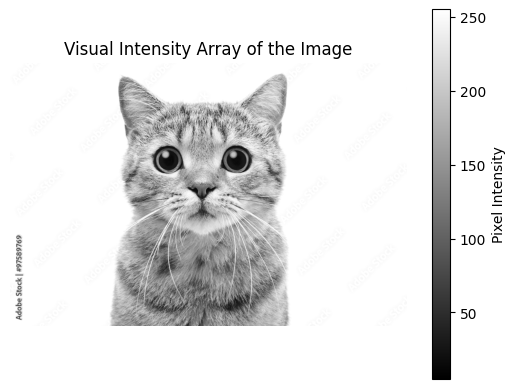

In [9]:

image_array = np.array(gray_image)

# Display the image as a visual intensity array
plt.imshow(image_array, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Visual Intensity Array of the Image')
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
# Normalize the pixel values to be between 0 and 1 for black, gray, and white
normalized_image_array = gray_image / 255.0

# Display the first few rows of the array as an example
print("First few rows of the normalized 2D numerical array:")
print(normalized_image_array[:5, :10])  # Print a small portion for brevity

# If we want to visualize this as an image, we would map 0 as black, 0.5 as gray, and 1 as white
plt.imshow(normalized_image_array, cmap='gray', vmin=0, vmax=1)
plt.colorbar(label='Normalized Pixel Intensity')
plt.title('2D Numerical Array as an Image')
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We will create an example image exhibiting saturation and noise

# Create a base image with a gradient
base_image = np.tile(np.linspace(0, 1, 256), (256, 1))

# Introduce saturation by clipping the gradient at 0.8 (which will become white)
saturated_image = np.clip(base_image, 0, 0.8)

# Normalize back to the range [0, 1]
saturated_image /= np.max(saturated_image)

# Add noise, more in the darker areas and less in the lighter areas
noise_intensity = 0.1  # Noise intensity factor
noise = np.random.normal(0, noise_intensity, saturated_image.shape)
noisy_image = saturated_image + (1 - saturated_image) * noise

# Ensure the noisy image is still in the range [0, 1] after adding noise
noisy_image = np.clip(noisy_image, 0, 1)

# Display the noisy and saturated image
plt.imshow(noisy_image, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Image with Saturation and Noise')
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
# Function to calculate the number of megabytes required to store images
def calculate_storage(N, k):
    return (N * k) / 1024

# Example: Let's calculate the storage for various values of N and k
# We'll create a list of tuples, each with a different (N, k) pair
nk_pairs = [(100, 500), (50, 1000), (200, 250), (500, 750)]

# Calculate the storage for each pair
storage_requirements = [(N, k, calculate_storage(N, k)) for N, k in nk_pairs]

# Return the results
storage_requirements


In [ ]:
def convert_to_linear_index(r, c, m):
    """
    Convert 2-D coordinates (r, c) to a linear index for column-major order.
    m is the number of rows in the 2-D array.
    """
    return r + c * m

# Example 2-D array dimensions
m, n = 5, 4  # 5 rows, 4 columns

# Example 2-D coordinates
coordinates = [(0, 0), (1, 0), (2, 1), (4, 3), (3, 2)]

# Calculate linear indices for each coordinate
linear_indices = [(r, c, convert_to_linear_index(r, c, m)) for r, c in coordinates]

# Display the results
linear_indices


In [ ]:
from PIL import Image

# Load the image
img_path = '/content/Cat.jpg'
image = Image.open(img_path)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Demonstrate changing spatial resolution by resizing the image
resized_image = image.resize((image.size[0]//2, image.size[1]//2))

# Display the resized image
plt.imshow(resized_image)
plt.title('Reduced Spatial Resolution')
plt.axis('off')
plt.show()

# Demonstrate changing intensity resolution by reducing color depth
def reduce_intensity_resolution(image, bits_per_pixel):
    factor = 256 / 2**bits_per_pixel
    return image.quantize(colors=2**bits_per_pixel)

# Reduce the intensity resolution of the original image to 4 bits per pixel
reduced_intensity_image = reduce_intensity_resolution(image, 4)

# Display the image with reduced intensity resolution
plt.imshow(reduced_intensity_image)
plt.title('Reduced Intensity Resolution (4 bpp)')
plt.axis('off')
plt.show()


In [ ]:
# Define a function to reduce the number of intensity levels in an image
def reduce_intensity_levels(image, levels):
    """
    Reduce the number of intensity levels in an image.
    :param image: PIL.Image object
    :param levels: Number of desired intensity levels
    :return: Image with reduced intensity levels
    """
    # Convert to grayscale for simplicity
    gray_image = image.convert('L')

    # Convert image to numpy array
    np_image = np.array(gray_image)

    # Scale the intensity levels
    max_intensity = 255
    factor = max_intensity // (levels - 1)
    reduced_intensity_image = (np_image // factor) * factor

    # Convert back to PIL image
    reduced_intensity_pil = Image.fromarray(reduced_intensity_image.astype('uint8'))

    return reduced_intensity_pil

# Let's demonstrate the effect of varying intensity levels on the grayscale version of the image
intensity_levels = [256, 128, 32, 8, 4, 2]  # Including 256 to represent the original image

# Plot the images with varying intensity levels
plt.figure(figsize=(12, 8))

for i, levels in enumerate(intensity_levels, start=1):
    reduced_intensity_image = reduce_intensity_levels(image, levels)
    plt.subplot(2, 3, i)
    plt.imshow(reduced_intensity_image, cmap='gray')
    plt.title(f'{levels} Intensity Levels')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial resolution (x-axis) and intensity resolution (y-axis) ranges
spatial_resolution = np.linspace(1, 10, 100)  # Arbitrary units for demonstration
intensity_resolution = np.linspace(1, 10, 100)  # Arbitrary units for demonstration

# Define isopreference curves for each type of image
# For simplicity, we'll use mathematical functions to represent the preferences

# Type A: Prefers higher spatial resolution
type_a_intensity = 5 / np.sqrt(spatial_resolution)

# Type B: Values both equally (linear relationship)
type_b_intensity = 10 - spatial_resolution

# Type C: Prefers higher intensity resolution
type_c_intensity = np.sqrt(spatial_resolution) * 2

# Plotting the isopreference curves
plt.figure(figsize=(8, 6))
plt.plot(spatial_resolution, type_a_intensity, label='Type A: Spatial Preference', linestyle='--')
plt.plot(spatial_resolution, type_b_intensity, label='Type B: Equal Preference', linestyle='-.')
plt.plot(spatial_resolution, type_c_intensity, label='Type C: Intensity Preference', linestyle=':')

# Labeling the plot
plt.title('Isopreference Curves for Different Image Types')
plt.xlabel('Spatial Resolution (arbitrary units)')
plt.ylabel('Intensity Resolution (bits per pixel)')
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.xlim(1, 10)

# Show the plot
plt.show()
